# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly 
import plotly.express as ex
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
!pip install -U pandasql
import pandasql as ps
from sklearn.metrics import accuracy_score

sns.set(style= 'whitegrid', color_codes=True)
# %matplotlib inline

# Importing Dataset -> "UK_Accident.csv"

In [2]:
accident_data_frame = pd.read_csv('UK_Accident.csv')

# Analysing Dataset

In [3]:
accident_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

In [4]:
accident_data_frame.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


## Null Percentage

In [5]:
(accident_data_frame.isnull().sum()/1504150)*100

Unnamed: 0                                     0.000000
Accident_Index                                 0.000000
Location_Easting_OSGR                          0.006715
Location_Northing_OSGR                         0.000000
Longitude                                      0.006715
Latitude                                       0.000000
Police_Force                                   0.000000
Accident_Severity                              0.000000
Number_of_Vehicles                             0.000000
Number_of_Casualties                           0.000000
Date                                           0.000000
Day_of_Week                                    0.000000
Time                                           0.007778
Local_Authority_(District)                     0.000000
Local_Authority_(Highway)                      0.000000
1st_Road_Class                                 0.000000
1st_Road_Number                                0.000000
Road_Type                                      0

#### Location_Easting_OSGR, Longitude, Time, Pedestrian_Crossing-Human_Control, Pedestrian_Crossing-Physical_Facilities,LSOA_of_Accident_Location
## These columns consists null values

In [6]:
accident_data_frame.shape

(1504150, 33)

In [7]:
accident_data_frame.sample(10)

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
531024,531024,2.01E+12,559240.0,101890.0,0.258109,50.794635,47,3,2,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01020945,2007
1464072,424619,2.01E+12,467975.0,105198.0,-1.035934,50.842258,44,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,No,E01017066,2014
177316,177316,2005600DE6081,318430.0,361450.0,-3.220996,53.143913,60,3,2,2,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,2,Yes,W01000203,2005
1237087,197634,201301VW40426,526540.0,167020.0,-0.182797,51.388068,1,3,2,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Unknown,Dry,None,None,1,Yes,E01003438,2013
1243224,203771,2.01E+12,352320.0,493270.0,-2.734753,54.332764,3,2,2,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01019359,2013
1195206,155753,201250JT2B002,250022.0,76537.0,-4.119269,50.569213,50,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,2,Yes,E01020333,2012
466588,466588,2.01E+12,397300.0,320740.0,-2.041482,52.784207,21,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,2,Yes,E01029732,2007
91317,91317,200522DC46161,382210.0,276360.0,-2.262821,52.384946,22,3,2,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01032476,2005
492575,492575,2.01E+12,584860.0,318540.0,0.736503,52.732860,36,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fog or mist,Wet/Damp,None,None,2,Yes,E01026443,2007
224767,224767,2.01E+12,330980.0,520220.0,-3.069169,54.572481,3,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,2,Yes,E01019106,2006


In [8]:
accident_data_frame.notnull().count()

Unnamed: 0                                     1504150
Accident_Index                                 1504150
Location_Easting_OSGR                          1504150
Location_Northing_OSGR                         1504150
Longitude                                      1504150
Latitude                                       1504150
Police_Force                                   1504150
Accident_Severity                              1504150
Number_of_Vehicles                             1504150
Number_of_Casualties                           1504150
Date                                           1504150
Day_of_Week                                    1504150
Time                                           1504150
Local_Authority_(District)                     1504150
Local_Authority_(Highway)                      1504150
1st_Road_Class                                 1504150
1st_Road_Number                                1504150
Road_Type                                      1504150
Speed_limi

#### As NULL values are less as compared to size of whole data
#### So, Preprocessing the data and filling the null values with logically identified values from each feature.

In [9]:
size_gb = accident_data_frame.groupby(by='Day_of_Week').size()
dev_color= size_gb.argsort().argsort() # argsort for index wise sorting
pal= sns.color_palette('Reds', len(dev_color)) # choose color palette accordingly

In [10]:
accident_data_frame['Road_Surface_Conditions'].fillna(value = 'Normal', inplace = True)
accident_data_frame['Special_Conditions_at_Site'].fillna(value = 'None', inplace = True)
accident_data_frame['Carriageway_Hazards'].fillna(value = 'None', inplace = True)
accident_data_frame['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(value = 'No', inplace = True)
accident_data_frame['Weather_Conditions'].fillna(value = 'Unknown', inplace = True)
accident_data_frame['Junction_Control'].fillna(value = 'None', inplace = True)
accident_data_frame['Location_Northing_OSGR'].fillna(value = 0, inplace = True)
accident_data_frame['Latitude'].fillna(value = 0, inplace = True)

### Analysing Casualities

In [11]:
data = {'Casualties_Count' : accident_data_frame['Number_of_Casualties'],
             'Day_of_Week' : accident_data_frame['Day_of_Week']}
accidents_per_week = pd.DataFrame(data)
accidents_per_week.groupby(by='Day_of_Week').sum().sort_values(by = 'Casualties_Count', ascending = False)

,Casualties_Count
Day_of_Week,
6,331934
5,299044
4,297756
3,294476
7,285261
2,284043
1,239532


In [12]:
cas_count = accidents_per_week.groupby(by='Day_of_Week').sum().sort_values(by = 'Casualties_Count', ascending = False)

<AxesSubplot:xlabel='Day_of_Week', ylabel='count'>

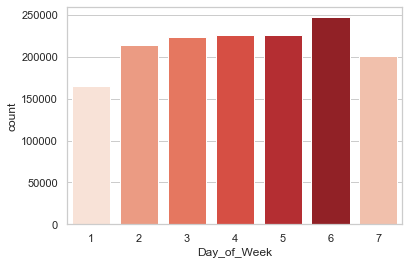

In [13]:
sns.countplot(x=accidents_per_week.Day_of_Week, 
              data=accidents_per_week,
              palette=np.array(pal[::])[dev_color]) 

<ul>
<li> <h3>6th day of the week has seen more number of accidents<h3/>
</ul>

### Analysing Speed Limit of the Driver

In [14]:
accidents_per_week['Speed_Limit'] = accident_data_frame.Speed_limit
accidents_per_week.sample(10)

,Casualties_Count,Day_of_Week,Speed_Limit
839215,1,2,40
730361,1,6,30
930152,1,2,70
844391,1,3,30
973584,1,2,60
1482956,1,3,60
811318,1,5,70
1223955,1,5,30
15590,1,2,30
1202960,3,1,70


In [15]:
chunks = []
for val in range(1,8) : # Since there are 7 days, we're using the loop from 1 to 8.
    qurery1 = """select accidents_per_week.Day_of_Week, sum(accidents_per_week.Casualties_Count) Casualties_Count,
            max(accidents_per_week.Speed_Limit) Max_Speed ,min(accidents_per_week.Speed_Limit) Min_Speed
            from accidents_per_week where accidents_per_week.Casualties_Count > 0 and accidents_per_week.Day_of_Week= """+str(val)
    chunks.append(ps.sqldf(qurery1, locals())) # parameters (Query, db_url) and returns DataFrame
    
speed_limit_accident_data = pd.concat(chunks, ignore_index=True) # concatination of chunks

### Min Speed and Max Speed during days of the week

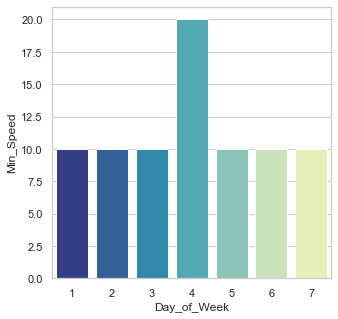

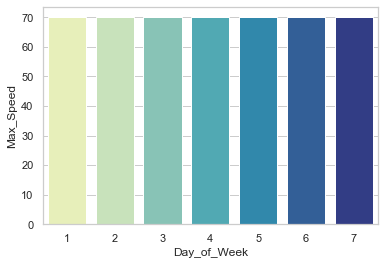

In [16]:
val = ["Max-Speed","Min_Speed"]
plt.figure(figsize=(5,5))
sns.barplot(x='Day_of_Week', y = 'Min_Speed' , data=speed_limit_accident_data, palette='YlGnBu_r')
plt.show()
sns.barplot(x='Day_of_Week', y = 'Max_Speed' , data=speed_limit_accident_data, palette='YlGnBu')
plt.show()

### Analysis of Accident Due to Light Condition

In [17]:
accident_severity_data = {'Light_Conditions' : accident_data_frame.Light_Conditions, 
                          'Weather_Conditions' : accident_data_frame.Weather_Conditions,
                          'Accident_Severity' : accident_data_frame.Accident_Severity}
accident_severity_df = pd.DataFrame(accident_severity_data)
accident_severity_df.sample(10)

,Light_Conditions,Weather_Conditions,Accident_Severity
319026,Darkness: Street lights present and lit,Fine without high winds,3
1085174,Daylight: Street light present,Fine without high winds,3
252367,Daylight: Street light present,Fine without high winds,3
449581,Daylight: Street light present,Fine without high winds,3
538038,Daylight: Street light present,Fine without high winds,3
684569,Daylight: Street light present,Fine without high winds,3
509519,Daylight: Street light present,Fine without high winds,3
1075814,Daylight: Street light present,Fine without high winds,3
1305265,Daylight: Street light present,Fine without high winds,2
320169,Darkeness: No street lighting,Fine without high winds,2


In [18]:
print(accident_severity_df.describe(),'\n')

       Accident_Severity
count       1.504150e+06
mean        2.838190e+00
std         4.018423e-01
min         1.000000e+00
25%         3.000000e+00
50%         3.000000e+00
75%         3.000000e+00
max         3.000000e+00 



In [19]:
# Converting Object data-type into Category datatype
for object_feature in accident_severity_df.dtypes[accident_severity_df.dtypes == 'object'].index :
     accident_severity_df[object_feature] = accident_severity_df[object_feature].astype('category')

In [20]:
# Getting the information of the accident severity dataframe after analysis
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 3 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   Light_Conditions    1504150 non-null  category
 1   Weather_Conditions  1504150 non-null  category
 2   Accident_Severity   1504150 non-null  int64   
dtypes: category(2), int64(1)
memory usage: 14.3 MB


### Performing One Hot Encoding on the categorical columns.

In [21]:
accident_severity_df = pd.get_dummies(data=accident_severity_df, columns=['Light_Conditions', 'Weather_Conditions'])

In [22]:
accident_severity_df.sample(5)

,Accident_Severity,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown
1274396,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0
482731,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0
833299,2,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1358379,3,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1006591,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0


### Correlation between 'Accident_Severity' and rest of variables

In [23]:
accident_severity = accident_severity_df.corr().loc['Accident_Severity':] 
accident_severity = pd.DataFrame(accident_severity)

In [24]:
# np.hstack(np.split(accident_severity, 1))
accident_severity

,Accident_Severity,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown
Accident_Severity,1.000000,-0.071174,0.002657,-0.018362,-0.003769,0.053096,-0.005982,-0.025910,-0.004042,0.012961,0.000549,0.018437,0.003080,0.010913,0.017108
Light_Conditions_Darkeness: No street lighting,-0.071174,1.000000,-0.025083,-0.119369,-0.016370,-0.399076,0.018572,-0.074911,0.058249,0.037683,0.048193,0.033486,0.028193,0.031123,-0.015329
Light_Conditions_Darkness: Street lighting unknown,0.002657,-0.025083,1.000000,-0.051555,-0.007070,-0.172360,-0.002335,-0.044742,0.005986,0.002229,0.000384,-0.006382,0.000715,0.003057,0.140243
Light_Conditions_Darkness: Street lights present and lit,-0.018362,-0.119369,-0.051555,1.000000,-0.033648,-0.820269,0.006970,-0.093839,0.011799,0.031787,0.041990,0.081967,0.001151,0.016986,-0.012381
Light_Conditions_Darkness: Street lights present but unlit,-0.003769,-0.016370,-0.007070,-0.033648,1.000000,-0.112492,0.003017,-0.018033,0.005796,0.008136,0.010302,0.012519,0.002725,0.001946,-0.001917
Light_Conditions_Daylight: Street light present,0.053096,-0.399076,-0.172360,-0.820269,-0.112492,1.000000,-0.015741,0.136071,-0.042865,-0.049729,-0.064212,-0.091339,-0.016129,-0.032296,-0.013322
Weather_Conditions_Fine with high winds,-0.005982,0.018572,-0.002335,0.006970,0.003017,-0.015741,1.000000,-0.222582,-0.008224,-0.016776,-0.013166,-0.040677,-0.004015,-0.009670,-0.015425
Weather_Conditions_Fine without high winds,-0.025910,-0.074911,-0.044742,-0.093839,-0.018033,0.136071,-0.222582,1.000000,-0.148175,-0.302260,-0.237214,-0.732891,-0.072337,-0.174238,-0.277918
Weather_Conditions_Fog or mist,-0.004042,0.058249,0.005986,0.011799,0.005796,-0.042865,-0.008224,-0.148175,1.000000,-0.011168,-0.008765,-0.027079,-0.002673,-0.006438,-0.010268
Weather_Conditions_Other,0.012961,0.037683,0.002229,0.031787,0.008136,-0.049729,-0.016776,-0.302260,-0.011168,1.000000,-0.017879,-0.055238,-0.005452,-0.013132,-0.020947


<AxesSubplot:>

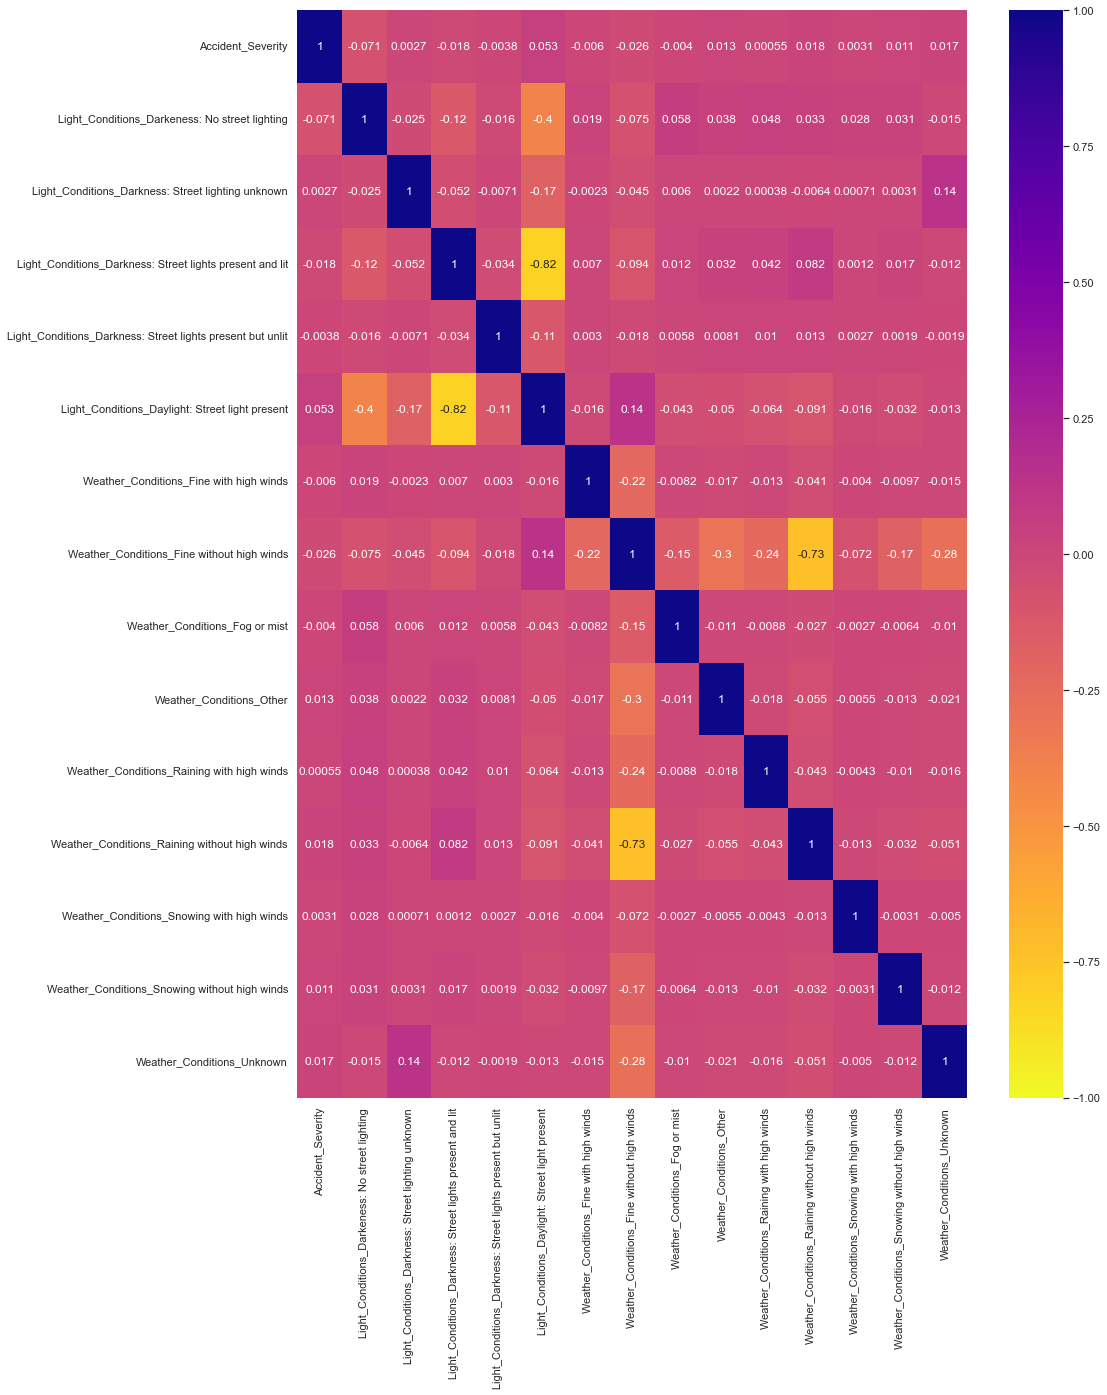

In [25]:
plt.figure(figsize=(15,20))
sns.heatmap(accident_severity, vmin=-1, cmap='plasma_r', annot = True)

<ul>
<li> <h3>From the above correlation, we have seen that Light_Conditions and Weather_Conditions are not much impactful, So we drop them <h3/>
<ul/>

In [26]:
accident_severity_df = accident_data_frame.copy()
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

### Columns below does not make much useful impact on the result so we drop them

In [27]:
accident_severity_df['Pedestrian_Crossing-Human_Control'].value_counts() 
accident_severity_df['Pedestrian_Crossing-Physical_Facilities'].value_counts() 
accident_severity_df['Light_Conditions'].value_counts() 
accident_severity_df['Special_Conditions_at_Site'].value_counts() 
accident_severity_df['Carriageway_Hazards'].value_counts()
accident_severity_df['Junction_Control'].value_counts()

Giveway or uncontrolled     733940
None                        602835
Automatic traffic signal    155717
Stop Sign                     9179
Authorised person             2479
Name: Junction_Control, dtype: int64

In [28]:
drop_cols= ['Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Light_Conditions'
           ,'Special_Conditions_at_Site','Carriageway_Hazards','Carriageway_Hazards','Junction_Control'
           ,'Did_Police_Officer_Attend_Scene_of_Accident']

### Analysis of Road Type Against Accident Severity

<AxesSubplot:xlabel='Road_Type', ylabel='Accident_Severity'>

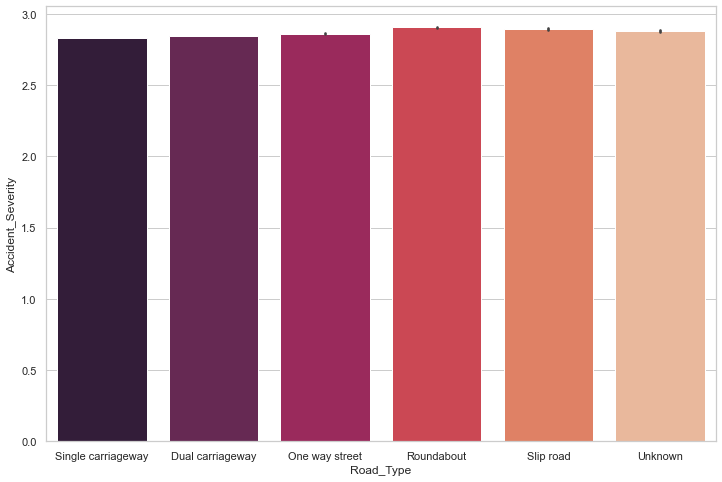

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Road_Type', y = 'Accident_Severity', data = accident_severity_df, palette='rocket')

### Analysis based on Road Surface Condition and Accident Severity

<AxesSubplot:xlabel='Road_Surface_Conditions', ylabel='Accident_Severity'>

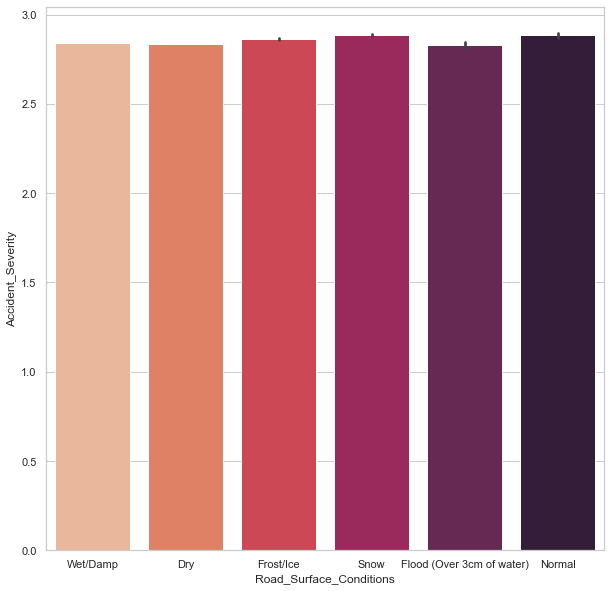

In [30]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'Road_Surface_Conditions', y = 'Accident_Severity', data = accident_severity_df, palette='rocket_r')

In [31]:
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

### Dropping all the columns which are of no use

In [32]:
for feature in accident_severity_df.dtypes[accident_severity_df.dtypes == 'object'].index :
    accident_severity_df.drop(columns = feature, inplace = True)

In [33]:
accident_severity_df = accident_severity_df.dropna()
accident_severity_df = accident_severity_df.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR'], axis=1)

In [34]:
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504049 entries, 0 to 1504149
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1504049 non-null  int64  
 1   Longitude                   1504049 non-null  float64
 2   Latitude                    1504049 non-null  float64
 3   Police_Force                1504049 non-null  int64  
 4   Accident_Severity           1504049 non-null  int64  
 5   Number_of_Vehicles          1504049 non-null  int64  
 6   Number_of_Casualties        1504049 non-null  int64  
 7   Day_of_Week                 1504049 non-null  int64  
 8   Local_Authority_(District)  1504049 non-null  int64  
 9   1st_Road_Class              1504049 non-null  int64  
 10  1st_Road_Number             1504049 non-null  int64  
 11  Speed_limit                 1504049 non-null  int64  
 12  2nd_Road_Class              1504049 non-null  int64  
 1

In [35]:
corr_matrix = accident_severity_df.corr()
corr_matrix

,Unnamed: 0,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
Unnamed: 0,1.000000,-0.101058,-0.019529,0.333481,-0.011274,0.003463,0.005057,-0.001843,0.340384,0.017961,0.006340,0.081332,-0.042904,-0.003921,0.100066,0.102000
Longitude,-0.101058,1.000000,-0.432531,-0.369755,0.013946,0.018442,-0.039501,-0.001894,-0.390536,-0.058800,-0.082418,-0.062824,0.045050,0.001401,-0.094278,0.038059
Latitude,-0.019529,-0.432531,1.000000,0.165894,-0.031357,-0.041153,0.032251,0.003851,0.119492,0.035500,0.044789,0.047431,-0.030516,0.017623,0.053018,-0.013750
Police_Force,0.333481,-0.369755,0.165894,1.000000,-0.031705,-0.015480,0.007084,0.000422,0.981973,0.044903,-0.000176,0.197974,-0.119029,-0.018283,0.240768,-0.033532
Accident_Severity,-0.011274,0.013946,-0.031357,-0.031705,1.000000,0.075981,-0.083537,0.002961,-0.031990,0.012750,-0.004075,-0.079105,0.064329,0.026126,-0.082210,-0.005906
Number_of_Vehicles,0.003463,0.018442,-0.041153,-0.015480,0.075981,1.000000,0.237368,-0.000116,-0.010495,-0.142300,-0.008872,0.084781,0.068605,0.024326,0.041113,-0.007850
Number_of_Casualties,0.005057,-0.039501,0.032251,0.007084,-0.083537,0.237368,1.000000,-0.001457,0.014325,-0.082983,0.007742,0.139546,-0.029212,0.001997,0.116028,-0.015141
Day_of_Week,-0.001843,-0.001894,0.003851,0.000422,0.002961,-0.000116,-0.001457,1.000000,0.000320,0.006843,0.002339,-0.015951,0.007831,0.000396,-0.016594,-0.003663
Local_Authority_(District),0.340384,-0.390536,0.119492,0.981973,-0.031990,-0.010495,0.014325,0.000320,1.000000,0.055867,0.010460,0.204911,-0.119087,-0.016622,0.253747,-0.037009
1st_Road_Class,0.017961,-0.058800,0.035500,0.044903,0.012750,-0.142300,-0.082983,0.006843,0.055867,1.000000,-0.089205,-0.389877,0.103459,-0.033914,-0.226847,-0.010922


<AxesSubplot:>

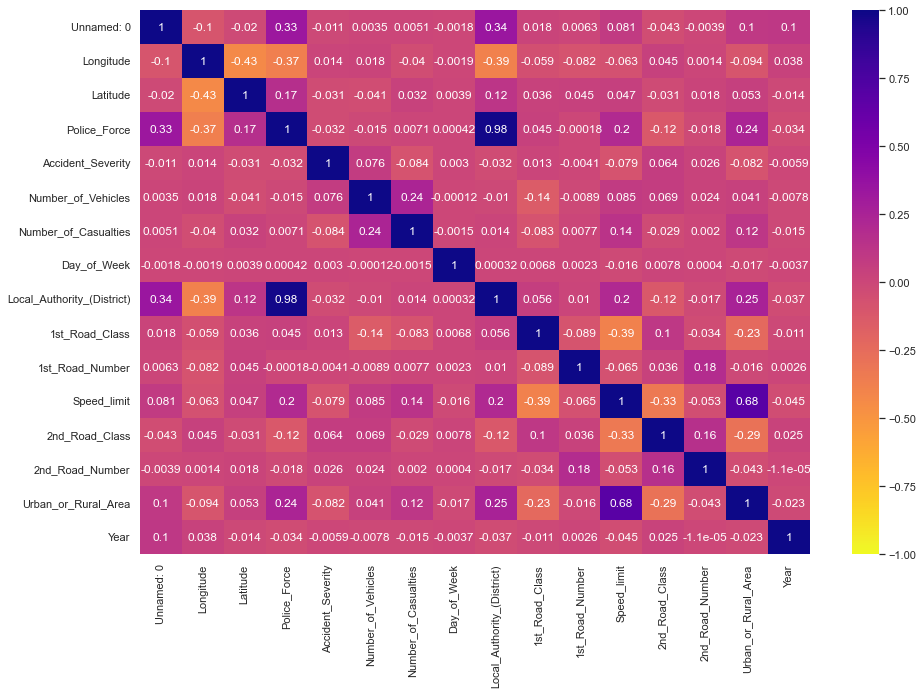

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, cmap='plasma_r')

In [37]:
final_accident_severity_dataframe = accident_severity_df.copy()
final_accident_severity_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504049 entries, 0 to 1504149
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1504049 non-null  int64  
 1   Longitude                   1504049 non-null  float64
 2   Latitude                    1504049 non-null  float64
 3   Police_Force                1504049 non-null  int64  
 4   Accident_Severity           1504049 non-null  int64  
 5   Number_of_Vehicles          1504049 non-null  int64  
 6   Number_of_Casualties        1504049 non-null  int64  
 7   Day_of_Week                 1504049 non-null  int64  
 8   Local_Authority_(District)  1504049 non-null  int64  
 9   1st_Road_Class              1504049 non-null  int64  
 10  1st_Road_Number             1504049 non-null  int64  
 11  Speed_limit                 1504049 non-null  int64  
 12  2nd_Road_Class              1504049 non-null  int64  
 1

### Removing remaining highly correlated columns

In [38]:
final_accident_severity_dataframe = final_accident_severity_dataframe.drop(['Police_Force', 'Local_Authority_(District)'], axis=1)

In [39]:
# Impactful columns for Accident_Severity are as follows
final_accident_severity_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504049 entries, 0 to 1504149
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1504049 non-null  int64  
 1   Longitude             1504049 non-null  float64
 2   Latitude              1504049 non-null  float64
 3   Accident_Severity     1504049 non-null  int64  
 4   Number_of_Vehicles    1504049 non-null  int64  
 5   Number_of_Casualties  1504049 non-null  int64  
 6   Day_of_Week           1504049 non-null  int64  
 7   1st_Road_Class        1504049 non-null  int64  
 8   1st_Road_Number       1504049 non-null  int64  
 9   Speed_limit           1504049 non-null  int64  
 10  2nd_Road_Class        1504049 non-null  int64  
 11  2nd_Road_Number       1504049 non-null  int64  
 12  Urban_or_Rural_Area   1504049 non-null  int64  
 13  Year                  1504049 non-null  int64  
dtypes: float64(2), int64(12)
memory us

## Splitting Data set into X and Y Variable

In [40]:
cols = ['Longitude', 'Latitude', 'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
                                                                           '1st_Road_Class', '1st_Road_Number', 'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
                                                                           'Urban_or_Rural_Area', 'Year']
# final_accident_severity_dataframe = final_accident_severity_dataframe.sample(100)
X = final_accident_severity_dataframe[cols]
Y = final_accident_severity_dataframe['Accident_Severity']

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504049 entries, 0 to 1504149
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Longitude             1504049 non-null  float64
 1   Latitude              1504049 non-null  float64
 2   Number_of_Vehicles    1504049 non-null  int64  
 3   Number_of_Casualties  1504049 non-null  int64  
 4   Day_of_Week           1504049 non-null  int64  
 5   1st_Road_Class        1504049 non-null  int64  
 6   1st_Road_Number       1504049 non-null  int64  
 7   Speed_limit           1504049 non-null  int64  
 8   2nd_Road_Class        1504049 non-null  int64  
 9   2nd_Road_Number       1504049 non-null  int64  
 10  Urban_or_Rural_Area   1504049 non-null  int64  
 11  Year                  1504049 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 149.2 MB


In [42]:
len(Y)

1504049

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [44]:
model_list = []
model_name = []

# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)

c:\Users\gupta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
log_y_pred = logistic_classifier.predict(X_test)

In [47]:
print('Accuracy score for test data is:', accuracy_score(y_test,log_y_pred))
model_list.append(accuracy_score(y_test,log_y_pred))
model_name.append('Logistic Regression')

Accuracy score for test data is: 0.8510689789980665


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, log_y_pred))

c:\Users\gupta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      4891
           2       0.20      0.00      0.00     51110
           3       0.85      1.00      0.92    320012

    accuracy                           0.85    376013
   macro avg       0.35      0.33      0.31    376013
weighted avg       0.75      0.85      0.78    376013



c:\Users\gupta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gupta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
d_tree_classifier = DecisionTreeClassifier()
d_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
d_tree_y_pred = d_tree_classifier.predict(X_test)

In [51]:
print('Accuracy score for test data is:', accuracy_score(y_test,d_tree_y_pred))
model_list.append(accuracy_score(y_test,d_tree_y_pred))
model_name.append('Decision Tree')

Accuracy score for test data is: 0.7524606861996793


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, d_tree_y_pred))

              precision    recall  f1-score   support

           1       0.06      0.07      0.07      4891
           2       0.20      0.22      0.21     51110
           3       0.87      0.85      0.86    320012

    accuracy                           0.75    376013
   macro avg       0.38      0.38      0.38    376013
weighted avg       0.76      0.75      0.76    376013



# KNN Classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
knn_y_pred = knn_classifier.predict(X_test)

In [55]:
print('Accuracy score for test data is:', accuracy_score(y_test,knn_y_pred))
model_list.append(accuracy_score(y_test,knn_y_pred))
model_name.append('KNN')

Accuracy score for test data is: 0.8323701574147703


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           1       0.07      0.01      0.02      4891
           2       0.23      0.06      0.09     51110
           3       0.86      0.97      0.91    320012

    accuracy                           0.83    376013
   macro avg       0.39      0.35      0.34    376013
weighted avg       0.76      0.83      0.79    376013



## Building a Custom Model using StackingClassifier

In [57]:
from sklearn.ensemble import StackingClassifier

In [58]:
my_models = [('logistic',logistic_classifier),('d_tree',d_tree_classifier),('knn',knn_classifier)]

In [59]:
sc = StackingClassifier(estimators=my_models, final_estimator=KNeighborsClassifier())

In [60]:
sc.fit(X_train, y_train)

c:\Users\gupta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\gupta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

StackingClassifier(estimators=[('logistic', LogisticRegression()),
                               ('d_tree', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=KNeighborsClassifier())

## Accuracy for the StackingClassifier

In [61]:
sc.score(X_train,y_train)

0.8460714019765326

## Classification of the StackingClassifier model.

In [62]:
sc_pred = sc.predict(X_test)

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, sc_pred))

              precision    recall  f1-score   support

           1       0.07      0.01      0.02      4891
           2       0.18      0.04      0.07     51110
           3       0.85      0.97      0.91    320012

    accuracy                           0.83    376013
   macro avg       0.37      0.34      0.33    376013
weighted avg       0.75      0.83      0.78    376013



In [64]:
model_list.append(accuracy_score(y_test,sc_pred))
model_name.append('Stacking')

## Getting the List of Accuracies of Different Algorithms i.e Logistic Regression, Decision Tree, KNN and Stacking

In [65]:
model_list = [x * 100 for x in model_list]

In [66]:
model_list

[85.10689789980665, 75.24606861996793, 83.23701574147702, 83.11069032187717]

c:\Users\gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

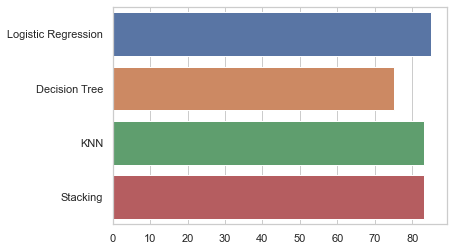

In [67]:
sns.barplot(model_list, model_name)

## Counting the value of the severity level from level 3 (Extreme) to level 1 (lowest)

In [68]:
result_X = X_test.copy()

In [69]:
result_X['Severity'] = sc_pred

In [70]:
result_X['Severity'].value_counts()

3    363842
2     11513
1       658
Name: Severity, dtype: int64

In [71]:
result_X['Severity'].unique()

array([3, 2, 1], dtype=int64)

In [72]:
dfx0 = result_X[result_X['Severity'] == 1]
dfx1 = result_X[result_X['Severity'] == 2]
dfx2 = result_X[result_X['Severity'] == 3]

In [73]:
plotting_dfx0 = dfx0[['Severity', 'Latitude', 'Longitude']].sample(100, replace = True).values.tolist()
plotting_dfx1 = dfx1[['Severity', 'Latitude', 'Longitude']].sample(100, replace = True).values.tolist()
plotting_dfx2 = dfx2[['Severity', 'Latitude', 'Longitude']].sample(100, replace = True).values.tolist()

## Importing Folium to visualize with tht Leaflet maps

In [74]:
import folium

In [75]:
map = folium.Map()

## Map for severity level 1

In [76]:
fg = folium.FeatureGroup(name = 'plotting_dfx0')
for i in plotting_dfx0:
  fg.add_child(folium.Marker(location = [i[1], i[2]],popup = i[0], icon = folium.Icon(color = 'green')))

In [77]:
map.add_child(fg)

## Map for severity level 1 and 2

In [78]:
fg = folium.FeatureGroup(name = 'plotting_dfx1')
for i in plotting_dfx1:
  fg.add_child(folium.Marker(location = [i[1], i[2]],popup = i[0], icon = folium.Icon(color = 'blue')))

In [79]:
map.add_child(fg)

## Map for all severity Level 1, 2 and 3

In [80]:
fg = folium.FeatureGroup(name = 'plotting_dfx2')
for i in plotting_dfx2:
  fg.add_child(folium.Marker(location = [i[1], i[2]],popup = i[0], icon = folium.Icon(color = 'red')))

In [81]:
map.add_child(fg)